## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here
!pip install sklearn
%matplotlib inline
import numpy as np
random_data = np.random.random((200, 2))
random_data

array([[0.91724064, 0.07996153],
       [0.54406149, 0.26873343],
       [0.92204433, 0.72095909],
       [0.72777584, 0.23260203],
       [0.95628924, 0.52061013],
       [0.96426426, 0.27464982],
       [0.2193127 , 0.25526528],
       [0.78578394, 0.01078288],
       [0.02608348, 0.90244527],
       [0.39223365, 0.05873339],
       [0.64092853, 0.65204008],
       [0.32496065, 0.47258423],
       [0.96379329, 0.24495431],
       [0.74277318, 0.65898021],
       [0.8419416 , 0.71304479],
       [0.40057009, 0.38888721],
       [0.22768137, 0.10567822],
       [0.05436659, 0.03197455],
       [0.85257565, 0.99620874],
       [0.80946967, 0.11784409],
       [0.32053472, 0.57765015],
       [0.08060473, 0.55292843],
       [0.72994246, 0.88251347],
       [0.76379613, 0.92826661],
       [0.72596586, 0.9155341 ],
       [0.86066347, 0.5771325 ],
       [0.01516408, 0.05815993],
       [0.70512557, 0.52886514],
       [0.46112332, 0.57383804],
       [0.35972537, 0.12701574],
       [0.

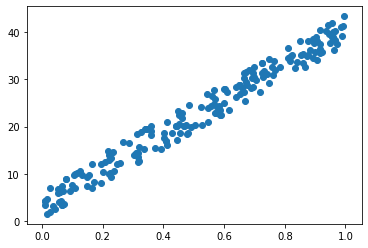

In [2]:
import matplotlib.pyplot as plt
X = random_data[:, 0]
y = random_data[:, 1]
import random
def assmuing_function(x):
    return 36.5 * x + 4 + random.randint(-3, 3)
y = [assmuing_function(x) for x in X]
plt.scatter(X, y)

In [3]:
y = np.array(y)
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.score(X.reshape(-1, 1), y)

0.9712866979392363

In [4]:
reg.coef_

array([37.27195075])

In [5]:
reg.intercept_

3.5947952660316105

In [6]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

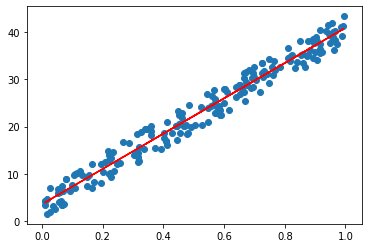

In [7]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [8]:
reg.predict([[0.7]])

array([29.68516079])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [9]:
# you code here
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)

In [10]:
def predict(x, k=5):
    # K值取多少合适，或少或多都会不准确，有什么好的评估方法
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    y_hats = [_y for x, _y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

In [11]:
myself_knn = model(X, y)

In [12]:
predict(0.7)

[(0.9220443306141731, 35.65461806741732), (0.9637932865487082, 36.17845495902785), (0.481887349137497, 18.58888824351864), (0.4471840838687158, 23.322219061208127), (0.010635274113363513, 3.3881875051377683)]


23.42647356726194

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [19]:
# you code here
from collections import Counter
from icecream import ic
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [32]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [21]:
# split_by_gender: F影响大
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income: —10影响大
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number 2的影响大
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# 我们最希望找到一种feature， split_by_some_feature: 
# split_by_pet 1的影响大
entropy([1, 1, 1, 1]) + entropy([0, 0, 0])

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


-0.0

In [27]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [41]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [39]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

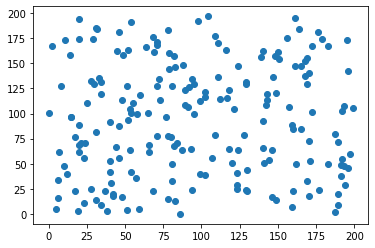

In [46]:
from sklearn.cluster import KMeans
X1 = [random.randint(0, 200) for _ in range(200)]
X2 = [random.randint(0, 200) for _ in range(200)]
plt.scatter(X1, X2)

In [63]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=7, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
cluster.cluster_centers_

array([[ 50.31818182, 174.45454545],
       [ 99.13793103,  49.17241379],
       [ 99.70967742, 128.35483871],
       [172.2       ,  45.46666667],
       [ 32.3030303 ,  34.03030303],
       [165.06451613, 144.5483871 ],
       [ 36.33333333, 107.5       ]])

In [65]:
cluster.labels_

array([1, 0, 2, 5, 5, 6, 6, 2, 5, 2, 5, 6, 5, 5, 4, 3, 2, 3, 5, 5, 0, 3,
       3, 6, 6, 6, 5, 6, 4, 3, 1, 0, 3, 0, 2, 2, 6, 4, 4, 5, 3, 5, 6, 5,
       0, 3, 2, 6, 2, 1, 1, 4, 2, 2, 5, 3, 1, 4, 5, 1, 3, 2, 3, 2, 5, 3,
       3, 6, 2, 3, 6, 1, 3, 0, 1, 5, 4, 6, 2, 2, 4, 1, 3, 3, 3, 2, 1, 3,
       0, 1, 1, 2, 6, 2, 1, 0, 4, 3, 2, 4, 4, 1, 5, 1, 2, 5, 4, 2, 6, 1,
       2, 0, 5, 1, 5, 4, 3, 6, 3, 0, 0, 0, 0, 4, 4, 6, 6, 0, 5, 2, 4, 1,
       0, 4, 1, 4, 2, 4, 2, 2, 3, 5, 1, 6, 0, 3, 4, 2, 3, 1, 2, 4, 2, 4,
       5, 5, 0, 1, 3, 1, 4, 1, 5, 4, 4, 3, 4, 5, 0, 4, 4, 0, 4, 6, 4, 1,
       3, 2, 6, 6, 5, 5, 6, 5, 6, 5, 4, 0, 4, 1, 0, 3, 4, 0, 3, 1, 1, 5,
       1, 2])

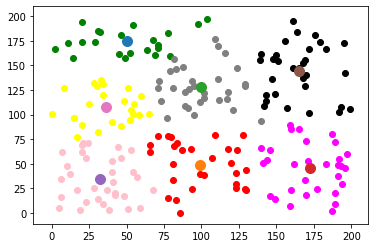

In [71]:
from collections import defaultdict
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

color = ['red', 'green', 'grey', 'black', 'yellow', 'pink', 'magenta'] #
for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])      
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是对真实世界的模拟，是对现实世界方法的一种抽象。
所以并没有一种模型能完全模拟真实的各种求情况，总会有部分信息没有考虑到。
而在世界解决问题的方法中，能找到解决大多数问题的关键，
所以一些好的模型是能帮助我们分析和解决实际问题的

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合就是对分析样本的特性，特征没有考虑够，过于简单，拟合不足
    比如二次函数，用一次函数模拟，就会模拟不足
过拟合就是完全模拟了所有数据，但是也包括错误的数据，过于复杂
   比如你好房价函数，用了很高阶的函数，导致偏差很大

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans
precision 是指预测为“是”并且预测正确的个数/预测为“是”的个数
$$ precision = \frac{TP}{TP + NP} $$

recall 是指预测为“是”并且预测正确的个数/实际上为“是”的个数
$$ precision = \frac{TP}{TP + FN} $$

ROC/AUC ROC: receiver oprating characteristic curve 由TPR和FPR组成的曲线

AUC: area under curve ROC曲线下的面积，ROC越大表现越好
$$TPR = \frac{TP}{TP + FN} $$
$$FPR = \frac{FP}{FP + TN} $$

F1、F2 由于precision和recall是此消彼长的，我们有时候需要平衡这两个标准，于是引入了F-score
$$ F-score = (1+\beta^2)\cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall} $$

$$ \beta = 1 时为F1，\beta = 2 时为F2 $$


# <评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:老师经常说了是，原来程序都是手动书写判断和逻辑，生成程序。而AI就好比写了解释器，做好打的框架，可以根据不同的输入，做相应的处理，是一种更高级的抽象。可以根据输入的数据进行不同的处理。
机器学习就是根据依据数据，自训练这种规格，并不断优化直至生成最有的结果

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

ANS:1： 机器学习就是处理数据，进行预测或者分类评估。 随意关键的是数据的处理，以及对特征因素的分析。 所以model大多是根据人类思考的因素，收取相关影响因素。  有了大量的数据，才能进行机器学习，分析个因素影响关系，直至生成一个优化的model。
所以数据的量影响了机器学习的效果，不过数据也是人为分析才收集的。
2：定义好了机器学习的效果和评估标准，才能采取合理的优化，生成更准确的模型

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [ ]:
# you code here


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [ ]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)